### Ordinary Least Square

In [14]:
from sklearn.linear_model import LinearRegression

X = [[0, 1], [2, 3], [3, 4.5]]
y = [1, 3, 6]

reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[-3.  4.]
-2.9999999999999996


- Mind the problem of **multicollinearity**
    - meaning the features are correlated with each other. The design matrix **X<span>** will close to singular
    - the model with be **highly sensitive to random variance**

### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

X = [[0, 1], [2, 3], [3, 4.5]]
y = [1, 3, 6]

reg = Ridge(alpha=0.5)
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[0.44444444 0.94444444]
-0.08333333333333481


- Using alpha to controls the amount of shrinkage, thus make the model more robust to collinearity

#### Plot Ridge coefficients as a function of the regularization

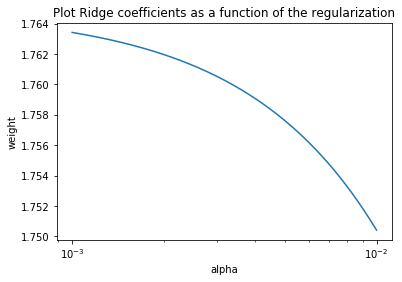

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

X = 1. / (np.arange(1, 11) + np.arange(0, 10))[:, np.newaxis] # np.newaxis equals to None, which just add a dimension
y = np.ones(10)

n_alphas = 200
alphas = np.logspace(-3, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weight')
plt.title("Plot Ridge coefficients as a function of the regularization")
plt.axis('tight')
plt.show()